In [1]:
import sys
import numpy as np
filename = 'Dataset.csv'

nbLignes = 0

X_train=[]
Y_train=[]

for line in open(filename,"r"):
    ligne=line.split(',')
    text=''
    for i in range(3,len(ligne)):
        if (i!=len(ligne)-1):
            text=text+ligne[i]+","
        else:
            text+=ligne[i]
    X_train.append(text)
    Y_train.append(ligne[1])
    nbLignes=nbLignes+1
    
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

X_test=X_train[-100000:]
Y_test=Y_train[-100000:]

X_train=X_train[1:100001]
Y_train=Y_train[1:100001]

In [2]:
def get_word(x):
    word=""
    word_list=[]
    flag=True
    for i in range(len(x)):
        if x[i].isalpha() or x[i]=="@" or x[i]=="&":
            if flag:
                word+=x[i]
                if i+1==len(x):
                    word_list.append(word)
            else:
                flag=True
                word+=x[i]

        else:
            flag=False
            if word!="":
                word_list.append(word)
            word=""
        if word=="http" or word=="www":
            word_list.append(x)
            break
    return word_list

In [3]:
dictionary={}
dictionary_inverse={}
couts=[]
k=0
for sentense in X_train:
    word_list=get_word(sentense)
    for word in word_list:
        if word not in dictionary:
            dictionary[word]=k
            k+=1
            dictionary_inverse[k]=word
            couts.append(1)
        else:
            index=dictionary[word]
            couts[index]+=1

In [4]:
new_dictionary={}
new_dictionary_inverse={}
k=1
for i in range(len(couts)):
    if (couts[i]>20):
        if (couts[i]<10000):
            word=dictionary_inverse[i]
            new_dictionary[word]=k
            new_dictionary_inverse[k]=word
            k+=1

In [5]:
def change_into_number(sentense):
    word_list=get_word(sentense)
    l=[]
    for i in range(len(word_list)):
        if word_list[i] in new_dictionary:
            k=new_dictionary[word_list[i]]
            if k not in l:
                l.append(k)
        else:
            l.append(0)
    return l

In [6]:
New_X_train=[]
New_X_test=[]
for tweet in X_train:
    New_X_train.append(change_into_number(tweet))
train=np.asarray(New_X_train)

for sentense in X_test:
    New_X_test.append(change_into_number(sentense))
test=np.asarray(New_X_test)

In [7]:
from keras.preprocessing import sequence
def sent2binaryVector (sentence): 
    v = np.zeros([k])
    for i in range(len(sentence)):
        v[sentence[i]-1]=1 
    return v



def convertCorpus2binary(corpus):
    M = np.zeros([len(corpus),k])
    i=0
    for x in corpus:
        v = sent2binaryVector(x)
        M[i,:] = v
        i+=1
    return M
print "Start construct the vector of train"
Vtrain =sequence.pad_sequences(train,maxlen=140)
print "Start construc the vector of test"
Vtest = sequence.pad_sequences(test,maxlen=140)

Using TensorFlow backend.


Start construct the vector of train
Start construc the vector of test


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
print "using the OneVsRestClassifier model to build the model...."
ovrc=OneVsRestClassifier(LinearSVC(random_state=0))
model=ovrc.fit(,Y_train_1)

In [27]:
print "Vtrain:",Vtest.shape

Vtrain: (100000, 140)


In [8]:
print "Building model LSTM..."
from keras.models import Sequential
from keras.layers import Dense, Activation,Embedding
from keras.layers import LSTM, SimpleRNN
from keras.optimizers import RMSprop, Adam
model = Sequential()
model.add(Embedding(k,128,dropout=0.2))
model.add(LSTM(128,dropout_W=0.2,dropout_U=0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


Building model LSTM...


In [9]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_1 (Embedding)          (None, None, 128)     524672      embedding_input_1[0][0]          
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 128)           131584      embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             129         lstm_1[0][0]                     
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 1)             0           dense_1[0][0]                    
Total params: 656,385
Trainable params: 656,385
Non-trainable params: 0
___________________

In [11]:
print "Start Training...."
history=model.fit(Vtrain, Y_train, batch_size=32, nb_epoch=5,validation_data=(Vtest, Y_test))

Start Training....
Train on 100000 samples, validate on 100000 samples
Epoch 1/5
100000/100000 [==============================] - 2136s - loss: 0.6113 - acc: 0.6659 - val_loss: 0.5951 - val_acc: 0.6853
Epoch 2/5
100000/100000 [==============================] - 2155s - loss: 0.5793 - acc: 0.6950 - val_loss: 0.5831 - val_acc: 0.6895
Epoch 3/5
100000/100000 [==============================] - 2232s - loss: 0.5688 - acc: 0.7023 - val_loss: 0.5806 - val_acc: 0.6875
Epoch 4/5
100000/100000 [==============================] - 2095s - loss: 0.5618 - acc: 0.7063 - val_loss: 0.6014 - val_acc: 0.6740
Epoch 5/5
100000/100000 [==============================] - 2082s - loss: 0.5545 - acc: 0.7116 - val_loss: 0.5907 - val_acc: 0.6825


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<class 'keras.callbacks.History'>
{'acc': [0.66586000000000001, 0.69503000000000004, 0.70230999999999999, 0.70628000000000002, 0.71164000000000005], 'loss': [0.61131004574775694, 0.57932202236175534, 0.56875802316665647, 0.56175575181961057, 0.55448332309722903], 'val_acc': [0.68525000000000003, 0.68947000000000003, 0.68747999999999998, 0.67401, 0.68245999999999996], 'val_loss': [0.59510812142848968, 0.58306574413776402, 0.58064801731109617, 0.601431538734436, 0.59066578504562373]}
[0, 1, 2, 3, 4]


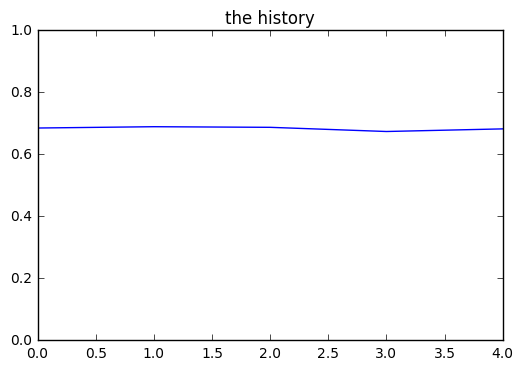

In [12]:
import matplotlib.pyplot as plt
print type(history)
print history.history
print history.epoch
def graph(history,flag):
    plt.ylim(0,+1)
    if flag:
        plt.plot(np.arange(len(history.epoch)), history.history['acc'])
    else:
        plt.plot(np.arange(len(history.epoch)), history.history['val_acc'])
    plt.title("the history")
    plt.show()
graph(history,False)
poid=model.get_weights()